# In which browsers are these reports running?
---
>[ ] Analysis of `BROWSER_NAME` field, also check `BROWSER_VERSION`


In [1]:
import pandas as pd

## Loading active reports and lightining page view

Active reports

In [2]:
active_reports = pd.read_csv('datasets/active_reports.csv', low_memory=False)

In [3]:
list(active_reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED',
 'ORIGIN',
 'IsActive']

Lightining Page View

In [4]:
lgtn_performance= pd.read_csv('../data/Salesforce/ELF/LightningPerformance/2022-06-04_LightningPerformance.csv', low_memory=False)

In [5]:
lgtn_performance.drop(['EVENT_TYPE','TIMESTAMP','REQUEST_ID','USER_ID','USER_TYPE','TIMESTAMP_DERIVED'], inplace=True, axis=1)

### Let's relate the reports to Lighting performance as follows:
>- We'll look at the common columns between Lightning performance and active reports
>- We will remove columns that we will not use
---

Define [common columns](https://github.com/dell-splab/lightning-analysis/blob/research-questions/Data%20Discovery%20-%20MUST%20READ.ipynb) beteween both",,

In [6]:
common_columns = ['USER_ID_DERIVED', 'SESSION_KEY', 'LOGIN_KEY', 'ORGANIZATION_ID', 'CLIENT_IP']

In [7]:
reports_performance = pd.merge(left=active_reports, right=lgtn_performance, on=common_columns)

Now let's merge tables

Let's make a data frame with just the columns that involve the browsers

In [10]:
reports_browsers = reports_performance[['BROWSER_NAME','BROWSER_VERSION']]

In [11]:
reports_browsers

,BROWSER_NAME,BROWSER_VERSION
0,CHROME,102.0
1,CHROME,102.0
2,CHROME,102.0
3,CHROME,102.0
4,CHROME,102.0
...,...,...
723077,EDGE,102.0
723078,EDGE,102.0
723079,EDGE,102.0
723080,EDGE,102.0


#### Let's now create two views with these columns
---

Plot for the most used browser

array([<AxesSubplot:title={'center':'BROWSER_NAME'}>], dtype=object)

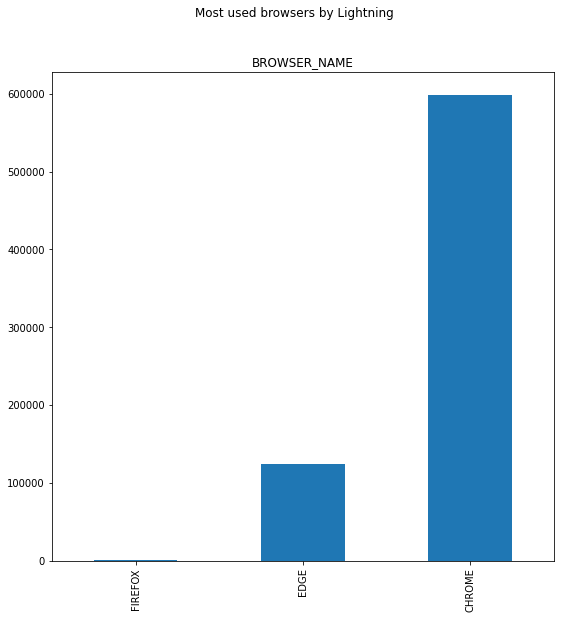

In [12]:
reports_browsers.BROWSER_NAME.value_counts(ascending=True).plot(kind='bar',
                                                               subplots=True,
                                                               title="Most used browsers by Lightning",
                                                               figsize=(9,9))

array([<AxesSubplot:title={'center':'None'}, ylabel='BROWSER_NAME,BROWSER_VERSION'>],
      dtype=object)

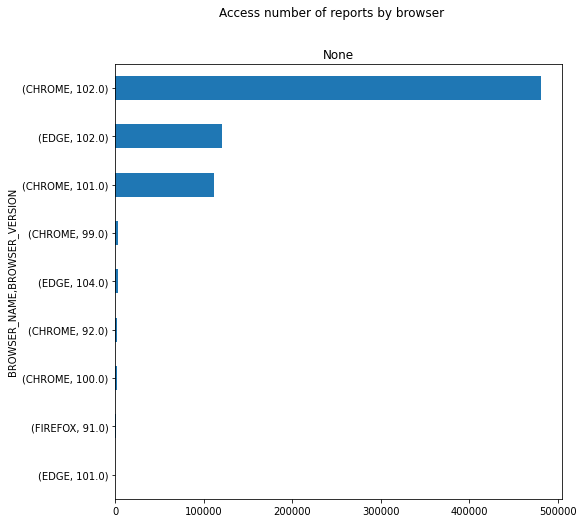

In [13]:
reports_browsers.value_counts(ascending=True).plot(kind='barh', 
                                                   subplots=True,
                                                   title="Access number of reports by browser",
                                                   figsize=(8,8))

In [ ]:
import matplotlib.pyplot as plt